In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation, Conv2D, MaxPooling2D, Flatten

from keras.optimizers import SGD
from keras import backend as K

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# image processing 
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from scipy.misc import imresize
import matplotlib.image as mpimg
import io
import urllib

Using TensorFlow backend.


In [2]:
############# RUNNING LOCALLY: Read in data FROM FILE ################

train = pd.read_csv('../data/train_data_with_sampling.csv')
test = pd.read_csv('../data/test_data.csv')
train.head()

genre_ids                   title  \
0      [18, 36, 10752]            The Round Up   
1  [10752, 28, 18, 36]  The Heroes of Telemark   
2      [35, 18, 10752]              Little Boy   
3      [18, 36, 10752]      The Flowers of War   
4  [28, 18, 36, 10752]                Defiance   

                        poster_path   tmdb_id  popularity  \
0  /iHJtP74X9hie5LZDwmFW7wugX1H.jpg   41411.0    1.966954   
1  /9nAExxKTVYOox0nR9nwtIkVEKN7.jpg   16850.0    1.885579   
2  /6eTWSy0kzsEpeBnlzK18aIO0qSf.jpg  256962.0    1.601023   
3  /s9Lgt28YhHIVllsF3N1FxwNuGre.jpg   76758.0    1.541161   
4  /ArY2fs0nK6DbrCKrxaMeCTVRZ0i.jpg   13813.0    2.094735   

                                            keywords  vote_count  \
0                                     woman director       233.0   
1           world war ii,saboteur,resistance fighter        23.0   
2                 japanese,world war ii,spirituality       153.0   
3                     forced prostitution,child rape       149.0   
4  brother brother relationship,fight,world war i...       467.0   

   vote_average              director  imdb_votes   ...   num_fx  month  \
0           7.4            Rose Bosch      6859.0   ...      2.0    3.0   
1           5.8          Anthony Mann      5155.0   ...      4.0   11.0   
2           7.0  Alejandro Monteverde     18045.0   ...     15.0    4.0   
3           7.0           Yimou Zhang     40751.0   ...      8.0   12.0   
4           6.6          Edward Zwick    121198.0   ...     26.0   12.0   

   decade  group5  group4  group7  group6  group1  group3  group2  
0    10.0     0.0     0.0     0.0     0.0     1.0     0.0     1.0  
1     5.0     0.0     0.0     0.0     1.0     1.0     0.0     1.0  
2    10.0     0.0     0.0     1.0     0.0     1.0     0.0     1.0  
3    10.0     0.0     0.0     0.0     0.0     1.0     0.0     1.0  
4     9.0     0.0     0.0     0.0     1.0     1.0     0.0     1.0  

[5 rows x 22 columns]

In [3]:
############# Convert to test and train set ################
X_train_ids = train[['tmdb_id']].values
y_train = train[['group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7']].as_matrix()
X_test_ids = test[['tmdb_id']].values
y_test = test[['group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7']].as_matrix()

In [5]:
def load_posters_from_ids(id_array, n, y):
    posters = []
    ids = []
    for i in range(n):
        id_poster = int(id_array[i][0])
        img = Image.open('../posters/' + str(int(id_array[i][0])) + '.jpg')
        scaled = img.resize(size=(100, 150))
        posters.append(np.asarray(scaled))
        ids.append(id_poster)
    Y = y[:n,]
    posters_array = np.asarray(posters)
    X = np.array(posters_array)
    
    print ('posters shape: ', X.shape)
    return X, Y

In [6]:
#### load testing and training data 

X_train, Y_train = load_posters_from_ids(X_train_ids, 500, y_train)
X_test, Y_test = load_posters_from_ids(X_test_ids, 100, y_test)

posters shape:  (500, 150, 100, 3)
posters shape:  (100, 150, 100, 3)


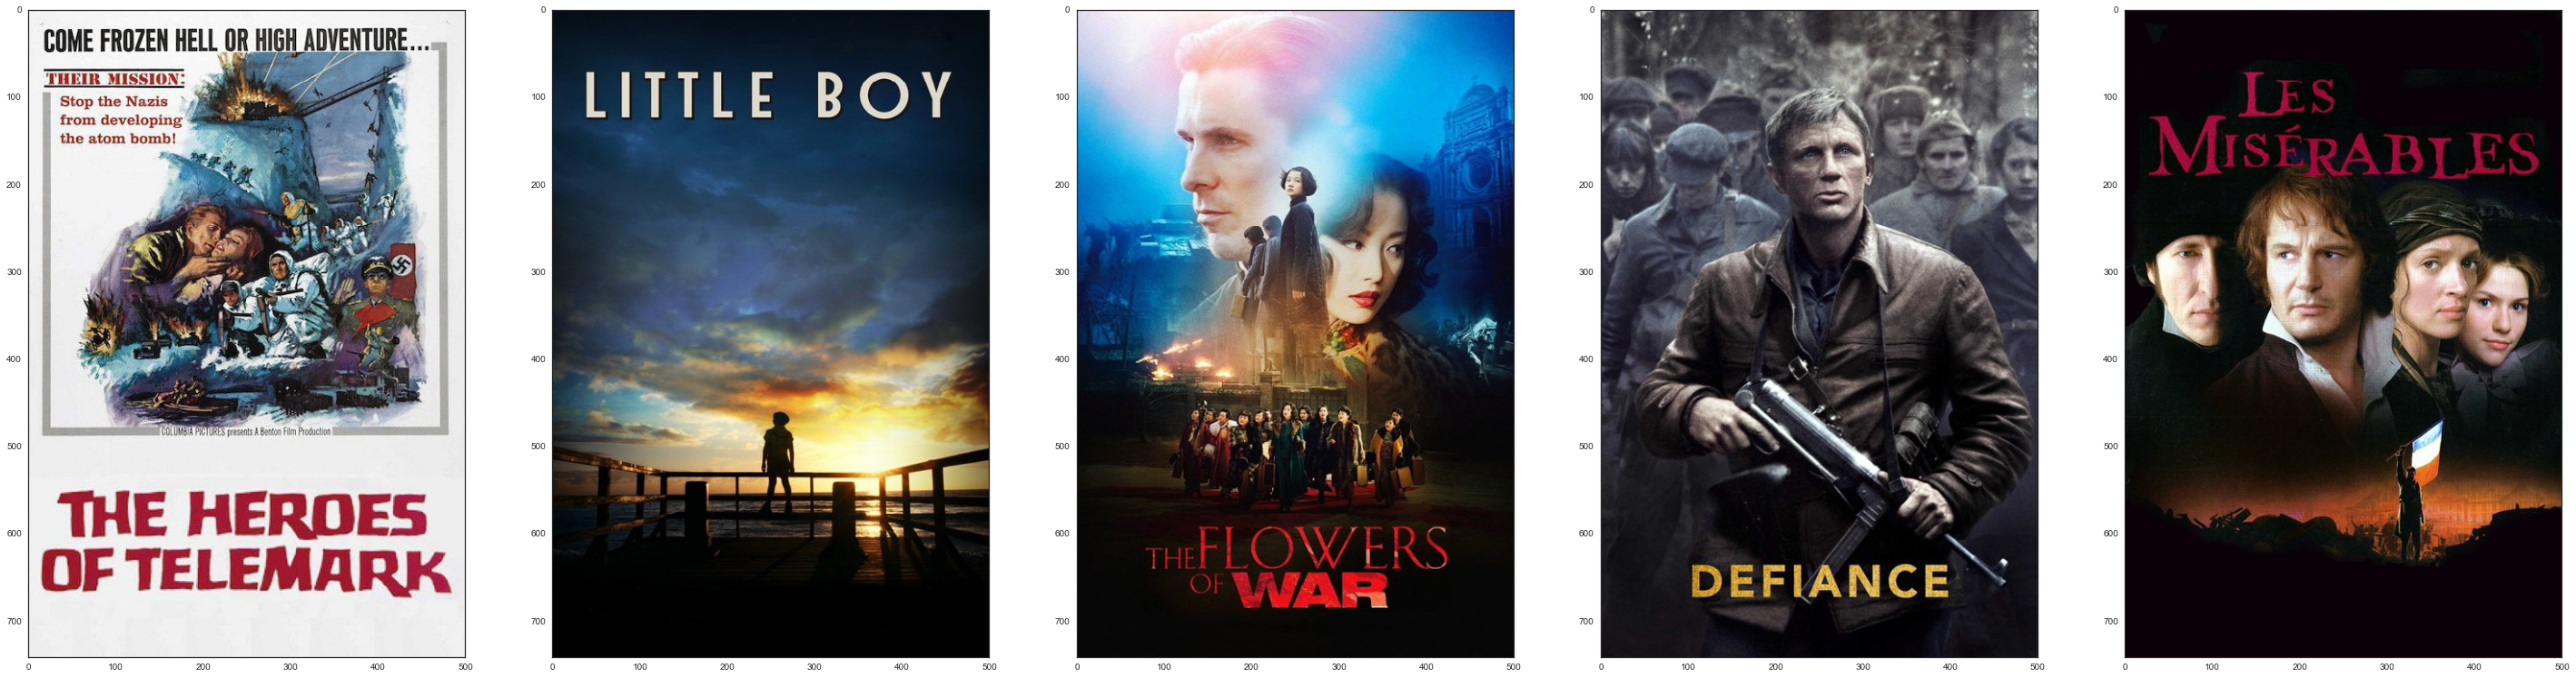

In [8]:
############# Visualise first 5 images of training set ################

plt.figure(figsize=(50,50))
for i in range(1,6):
    plt.subplot(1, 5, i)
    plt.imshow(X_train[i])

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [31]:
import os
#os.mkdir('sample')
for k in range(500):
    print("start "+str(k))
    #id = X_train_ids[k][0]
    os.mkdir('augmentation'+str(k))
    x = img_to_array(X_train[k])  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0 
    for batch in datagen.flow(x, batch_size=1, save_to_dir='augmentation'+str(k),save_prefix='sample_img', save_format='jpeg'):
        i +=1
        if i > 9:
            break

start 0
start 1
start 2
start 3
start 4
start 5
start 6
start 7
start 8
start 9
start 10
start 11
start 12
start 13
start 14
start 15
start 16
start 17
start 18
start 19
start 20
start 21
start 22
start 23
start 24
start 25
start 26
start 27
start 28
start 29
start 30
start 31
start 32
start 33
start 34
start 35
start 36
start 37
start 38
start 39
start 40
start 41
start 42
start 43
start 44
start 45
start 46
start 47
start 48
start 49
start 50
start 51
start 52
start 53
start 54
start 55
start 56
start 57
start 58
start 59
start 60
start 61
start 62
start 63
start 64
start 65
start 66
start 67
start 68
start 69
start 70
start 71
start 72
start 73
start 74
start 75
start 76
start 77
start 78
start 79
start 80
start 81
start 82
start 83
start 84
start 85
start 86
start 87
start 88
start 89
start 90
start 91
start 92
start 93
start 94
start 95
start 96
start 97
start 98
start 99
start 100
start 101
start 102
start 103
start 104
start 105
start 106
start 107
start 108
start 109
start 110


In [8]:
from PIL import Image
import glob
X_augmentation_train = []
Y_augmentation_train = []
for k in range(500):
    for filename in glob.glob('augmentation'+str(k)+'/*.jpeg'):
        im=Image.open(filename)
        scaled = im.resize(size=(100, 150))
        X_augmentation_train.append(np.asarray(scaled))
        Y_augmentation_train.append(list(Y_train[k]))

In [9]:
X_augmentation_train_array = np.array(X_augmentation_train)
Y_augmentation_train_array = np.array(Y_augmentation_train)
print(X_augmentation_train_array.shape)
print(Y_augmentation_train_array.shape)

(4997, 150, 100, 3)
(4997, 7)


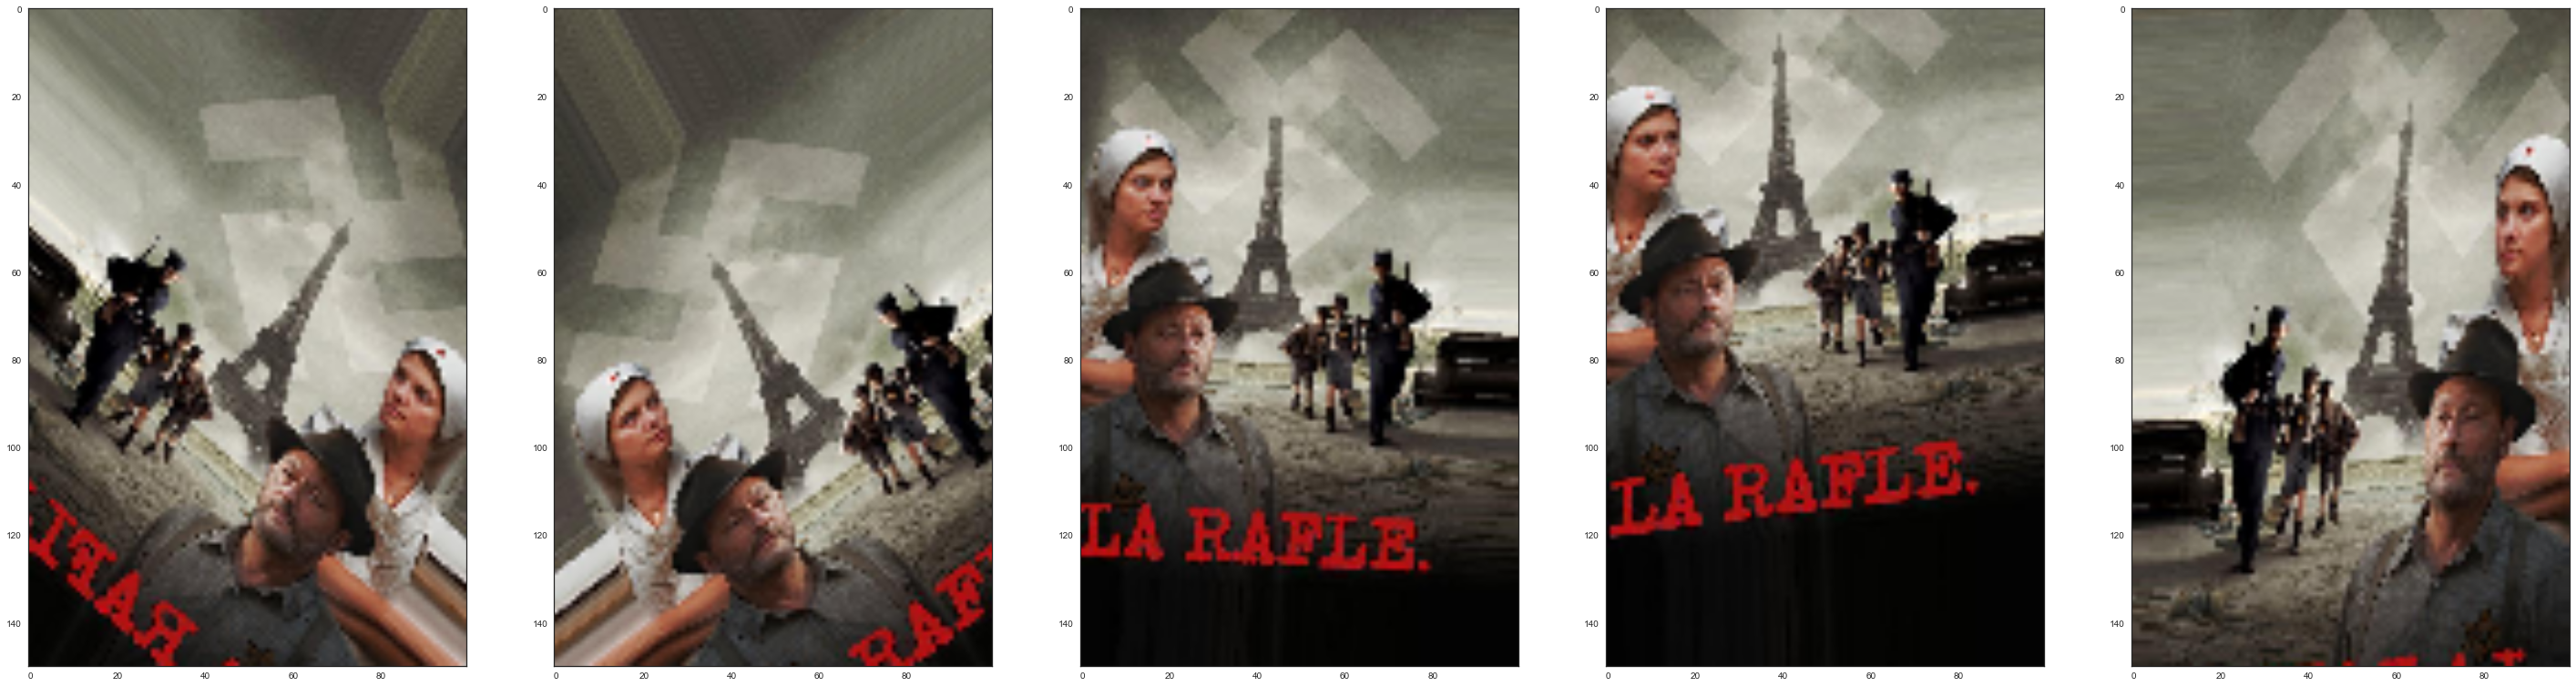

In [10]:
# show some augmented images
plt.figure(figsize=(50,50))
for i in range(1,6):
    plt.subplot(1, 5, i)
    plt.imshow(X_augmentation_train_array[i])

In [17]:
# 3 conv max pool layers and 2 fully connected output layers
n_out = 7

####### Model ##########

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# output is a 3D feature map (height, width, features)

# add two fully connected output layers

model.add(Flatten()) # 1D feature vector
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=n_out, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam')

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 98, 32)       896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 6, 64)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3840)              0         
__________

In [20]:
# use a data generator to scale the images (pixel values)
batch_size = 100
epochs = 10
model.fit(x = X_augmentation_train_array, y = Y_augmentation_train_array, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
model.save_weights('simple_model.h5')

Epoch 1/10
4997/4997 [==============================] - 93s - loss: 3.5596    
Epoch 2/10
4997/4997 [==============================] - 100s - loss: 3.4881   
Epoch 3/10
4997/4997 [==============================] - 86s - loss: 3.3994    
Epoch 4/10
4997/4997 [==============================] - 98s - loss: 3.3179    
Epoch 5/10
4997/4997 [==============================] - 84s - loss: 3.2364    
Epoch 6/10
4997/4997 [==============================] - 90s - loss: 3.1596    
Epoch 7/10
4997/4997 [==============================] - 96s - loss: 3.0987    
Epoch 8/10
4997/4997 [==============================] - 90s - loss: 3.0523    
Epoch 9/10
4997/4997 [==============================] - 83s - loss: 3.0229    
Epoch 10/10
4997/4997 [==============================] - 85s - loss: 2.9869    


In [21]:
# These are how we measure error - Haming Loss, % exact matches and % at-least-one match
from sklearn.metrics import hamming_loss

def error_measures(ypred, ytest):
    ypred = np.array(ypred)
    ytest = np.array(ytest)
    
    # Hamming loss
    h_loss = hamming_loss(ytest, ypred)

    # Percent exact matches
    y_pred_str = np.array([str(yi) for yi in ypred])
    y_test_str = np.array([str(yi) for yi in ytest])
    percent_exact = np.sum(y_pred_str == y_test_str) * 1. / ytest.shape[0]
    
    # Percent at least one match (at least one of the genres are both 1)
    atleastone_count = 0
    for ind in range(len(ypred)):
        yi_pred = ypred[ind]
        yi_test = ytest[ind]
        for i in range(len(yi_pred)):
            if yi_pred[i] == 1 and yi_test[i] == 1:
                atleastone_count += 1
                break
    percent_atleastone = atleastone_count * 1. / ytest.shape[0]
    
    return h_loss, percent_exact, percent_atleastone

In [22]:
################# Make predictions on the testing set ###################
y_pred_proba = model.predict(X_test, 
                             batch_size=batch_size)

# Predict after casting probabilities to labels
y_pred = []
for yi in y_pred_proba:
    yi_new = np.array([1 if yii >= 0.5 else 0 for yii in yi])
    y_pred.append(yi_new)
y_pred = np.array(y_pred)

In [23]:
# compute error measures
h_loss, percent_exact, percent_atleastone = error_measures(y_pred, Y_test)
print ('CNN error measures \n=====================\n')
print ('Hamming Loss: ', h_loss)
print ('Percent exact: ', percent_exact)
print ('Percent at least one: ', percent_atleastone)

CNN error measures 

Hamming Loss:  0.10571428571428572
Percent exact:  0.49
Percent at least one:  1.0
